In [1]:
# Plot ad hoc CIFAR10 instances
# Simple CNN model for CIFAR-10
from keras.datasets import cifar10
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adadelta, RMSprop
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

import os
import time
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [4]:

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
batch_normalization = True
model = Sequential()

#Layer 1 
model.add( Conv2D(32, kernel_size=(3,3),strides=(1,1), activation='relu', padding='same', input_shape=X_train.shape[1:] ) )
if batch_normalization: model.add(BatchNormalization())
#Layer 2 
model.add( Conv2D(32, kernel_size=(3,3),strides=(1,1), activation='relu', padding='same') )
if batch_normalization: model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)) )
model.add(Dropout(0.2))


#Layer 3
model.add( Conv2D(64, kernel_size=(3,3), activation='relu', padding='same') )
if batch_normalization: model.add(BatchNormalization())
#Layer 4
model.add( Conv2D(64, kernel_size=(3,3), activation='relu', padding='same') )
if batch_normalization: model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)) )
model.add(Dropout(0.2))

#Layer 5  
model.add( Conv2D(128, kernel_size=(3,3), activation='relu', padding='same') )
if batch_normalization: model.add(BatchNormalization())
#Layer 6                         
model.add( Conv2D(128, kernel_size=(3,3), activation='relu', padding='same') )
if batch_normalization: model.add(BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2),strides=(2,2)) )
model.add(Dropout(0.2)) 


# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

# Compile model
epochs = 50
batch_size = 128
rms = RMSprop(learning_rate=0.001, rho=0.9)


model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=rms,
              metrics=['accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_15 (Batc (None, 16, 16, 64)       

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('model3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Fit the model
t0=time.time()
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size,  callbacks=[es,mc])
t1=time.time()

# load the saved model
saved_model = load_model('best_model.h5')

# Final evaluation of the model
scores = saved_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("training time:", round(t1-t0, 3), "s") # the time would be round to 3 decimal in seconds

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 276s 6ms/step - loss: 1.3926 - accuracy: 0.5310 - val_loss: 2.0561 - val_accuracy: 0.3723

Epoch 00001: val_accuracy improved from -inf to 0.37230, saving model to model3.h5
Epoch 2/50
50000/50000 [==============================] - 272s 5ms/step - loss: 0.8141 - accuracy: 0.7171 - val_loss: 0.9275 - val_accuracy: 0.6815

Epoch 00002: val_accuracy improved from 0.37230 to 0.68150, saving model to model3.h5
Epoch 3/50
50000/50000 [==============================] - 279s 6ms/step - loss: 0.6159 - accuracy: 0.7867 - val_loss: 1.0372 - val_accuracy: 0.6762

Epoch 00003: val_accuracy did not improve from 0.68150
Epoch 4/50
50000/50000 [==============================] - 278s 6ms/step - loss: 0.4824 - accuracy: 0.8319 - val_loss: 0.7034 - val_accuracy: 0.7666

Epoch 00004: val_accuracy improved from 0.68150 to 0.76660, saving model to model3.h5
Epoch 5/50
50000/50000 [====================

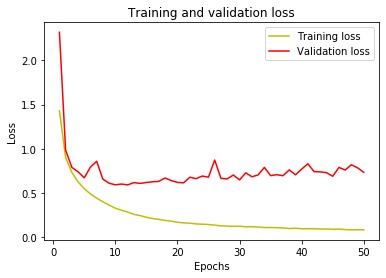

In [7]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

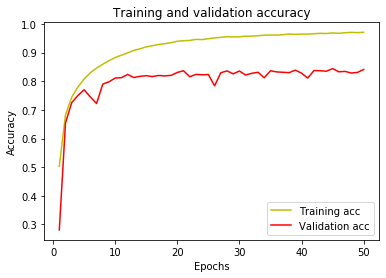

In [8]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()